In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [128]:
top_similar_df = pd.read_pickle("similarity_df.pkl")

analyzer = SentimentIntensityAnalyzer()
top_similar_df['vader_score'] = top_similar_df['plot'].apply(lambda x: analyzer.polarity_scores(x))


In [129]:
all_events = top_similar_df['event'].unique()
all_events


array(['Negotiations_to_end_apartheid_in_South_Africa', 'Nelson_Mandela',
       'Fall_of_the_Berlin_Wall', 'Stanislav_Petrov', 'Falklands_War',
       'Attempted_assassination_of_Ronald_Reagan#:~:text=On%20March%2030%2C%201981%2C%20President,engagement%20at%20the%20Washington%20Hilton.',
       'Iranian_Revolution#:~:text=Iranian%20people%20voted%20in%20a,it%20created%20throughout%20the%20world.',
       'Apollo_13', 'Apollo_11',
       'Death_and_state_funeral_of_Winston_Churchill',
       'Civil_Rights_Act_of_1964', 'Assassination_of_John_F._Kennedy',
       'Berlin_Wall', 'Vietnam_War', 'Great_Leap_Forward', 'Sputnik_2',
       'Hungarian_Revolution_of_1956', 'Warsaw_Pact',
       'Brown_v._Board_of_Education', 'Korean_War', 'Marshall_Plan',
       'Cold_War', 'Truman_Doctrine',
       'Atomic_bombings_of_Hiroshima_and_Nagasaki',
       'Attack_on_Pearl_Harbor'], dtype=object)

In [133]:
allevents =[['Negotiations_to_end_apartheid_in_South_Africa', 1994] ,['Nelson_Mandela', 1990],
       ['Fall_of_the_Berlin_Wall', 1989], ['Stanislav_Petrov', 1983], ['Falklands_War', 1982],
       ['Attempted_assassination_of_Ronald_Reagan#:~:text=On%20March%2030%2C%201981%2C%20President,engagement%20at%20the%20Washington%20Hilton.', 1980],
       ['Iranian_Revolution#:~:text=Iranian%20people%20voted%20in%20a,it%20created%20throughout%20the%20world.', 1979],
       ['Apollo_13', 1970], ['Apollo_11', 1969],
       ['Death_and_state_funeral_of_Winston_Churchill', 1965],
       ['Civil_Rights_Act_of_1964', 1964], 
       ['Assassination_of_John_F._Kennedy', 1963],
       ['Berlin_Wall', 1961], ['Vietnam_War', 1959], 
       ['Great_Leap_Forward', 1958], 
       ['Sputnik_2', 1957], ['Hungarian_Revolution_of_1956', 1956],
       [ 'Warsaw_Pact', 1955],
       ['Brown_v._Board_of_Education', 1954], ['Korean_War', 1950], ['Marshall_Plan',1948],
       ['Cold_War', 1947], ['Truman_Doctrine', 1947],
       ['Atomic_bombings_of_Hiroshima_and_Nagasaki', 1945],
       ['Attack_on_Pearl_Harbor', 1941]]

In [131]:
top_similar_df['negative'] = top_similar_df['vader_score'].apply(lambda x: x['neg'])
top_similar_df['positive'] = top_similar_df['vader_score'].apply(lambda x: x['pos'])
top_similar_df['neutral'] = top_similar_df['vader_score'].apply(lambda x: x['neu'])
top_similar_df['compound'] = top_similar_df['vader_score'].apply(lambda x: x['compound'])


date is  ['Nelson_Mandela', 1990]
Negotiations_to_end_apartheid_in_South_Africa 0.04839292811865359
date is  ['Nelson_Mandela', 1990]
Nelson_Mandela 0.07012595083108497
date is  ['Nelson_Mandela', 1990]
Fall_of_the_Berlin_Wall 0.021005655496721176
date is  ['Nelson_Mandela', 1990]
Stanislav_Petrov 0.034850592994730145
date is  ['Nelson_Mandela', 1990]
Falklands_War 0.013512328455397293
date is  ['Nelson_Mandela', 1990]
Attempted_assassination_of_Ronald_Reagan#:~:text=On%20March%2030%2C%201981%2C%20President,engagement%20at%20the%20Washington%20Hilton. 0.08058198965179764
date is  ['Nelson_Mandela', 1990]
Iranian_Revolution#:~:text=Iranian%20people%20voted%20in%20a,it%20created%20throughout%20the%20world. 0.06294699992794972
date is  ['Nelson_Mandela', 1990]
Apollo_13 0.0003921574285700169
date is  ['Nelson_Mandela', 1990]
Apollo_11 9.025916106919496e-05
date is  ['Nelson_Mandela', 1990]
Death_and_state_funeral_of_Winston_Churchill 0.22766879650898608
date is  ['Nelson_Mandela', 1990]
C

IndexError: index 1 is out of bounds for axis 0 with size 1

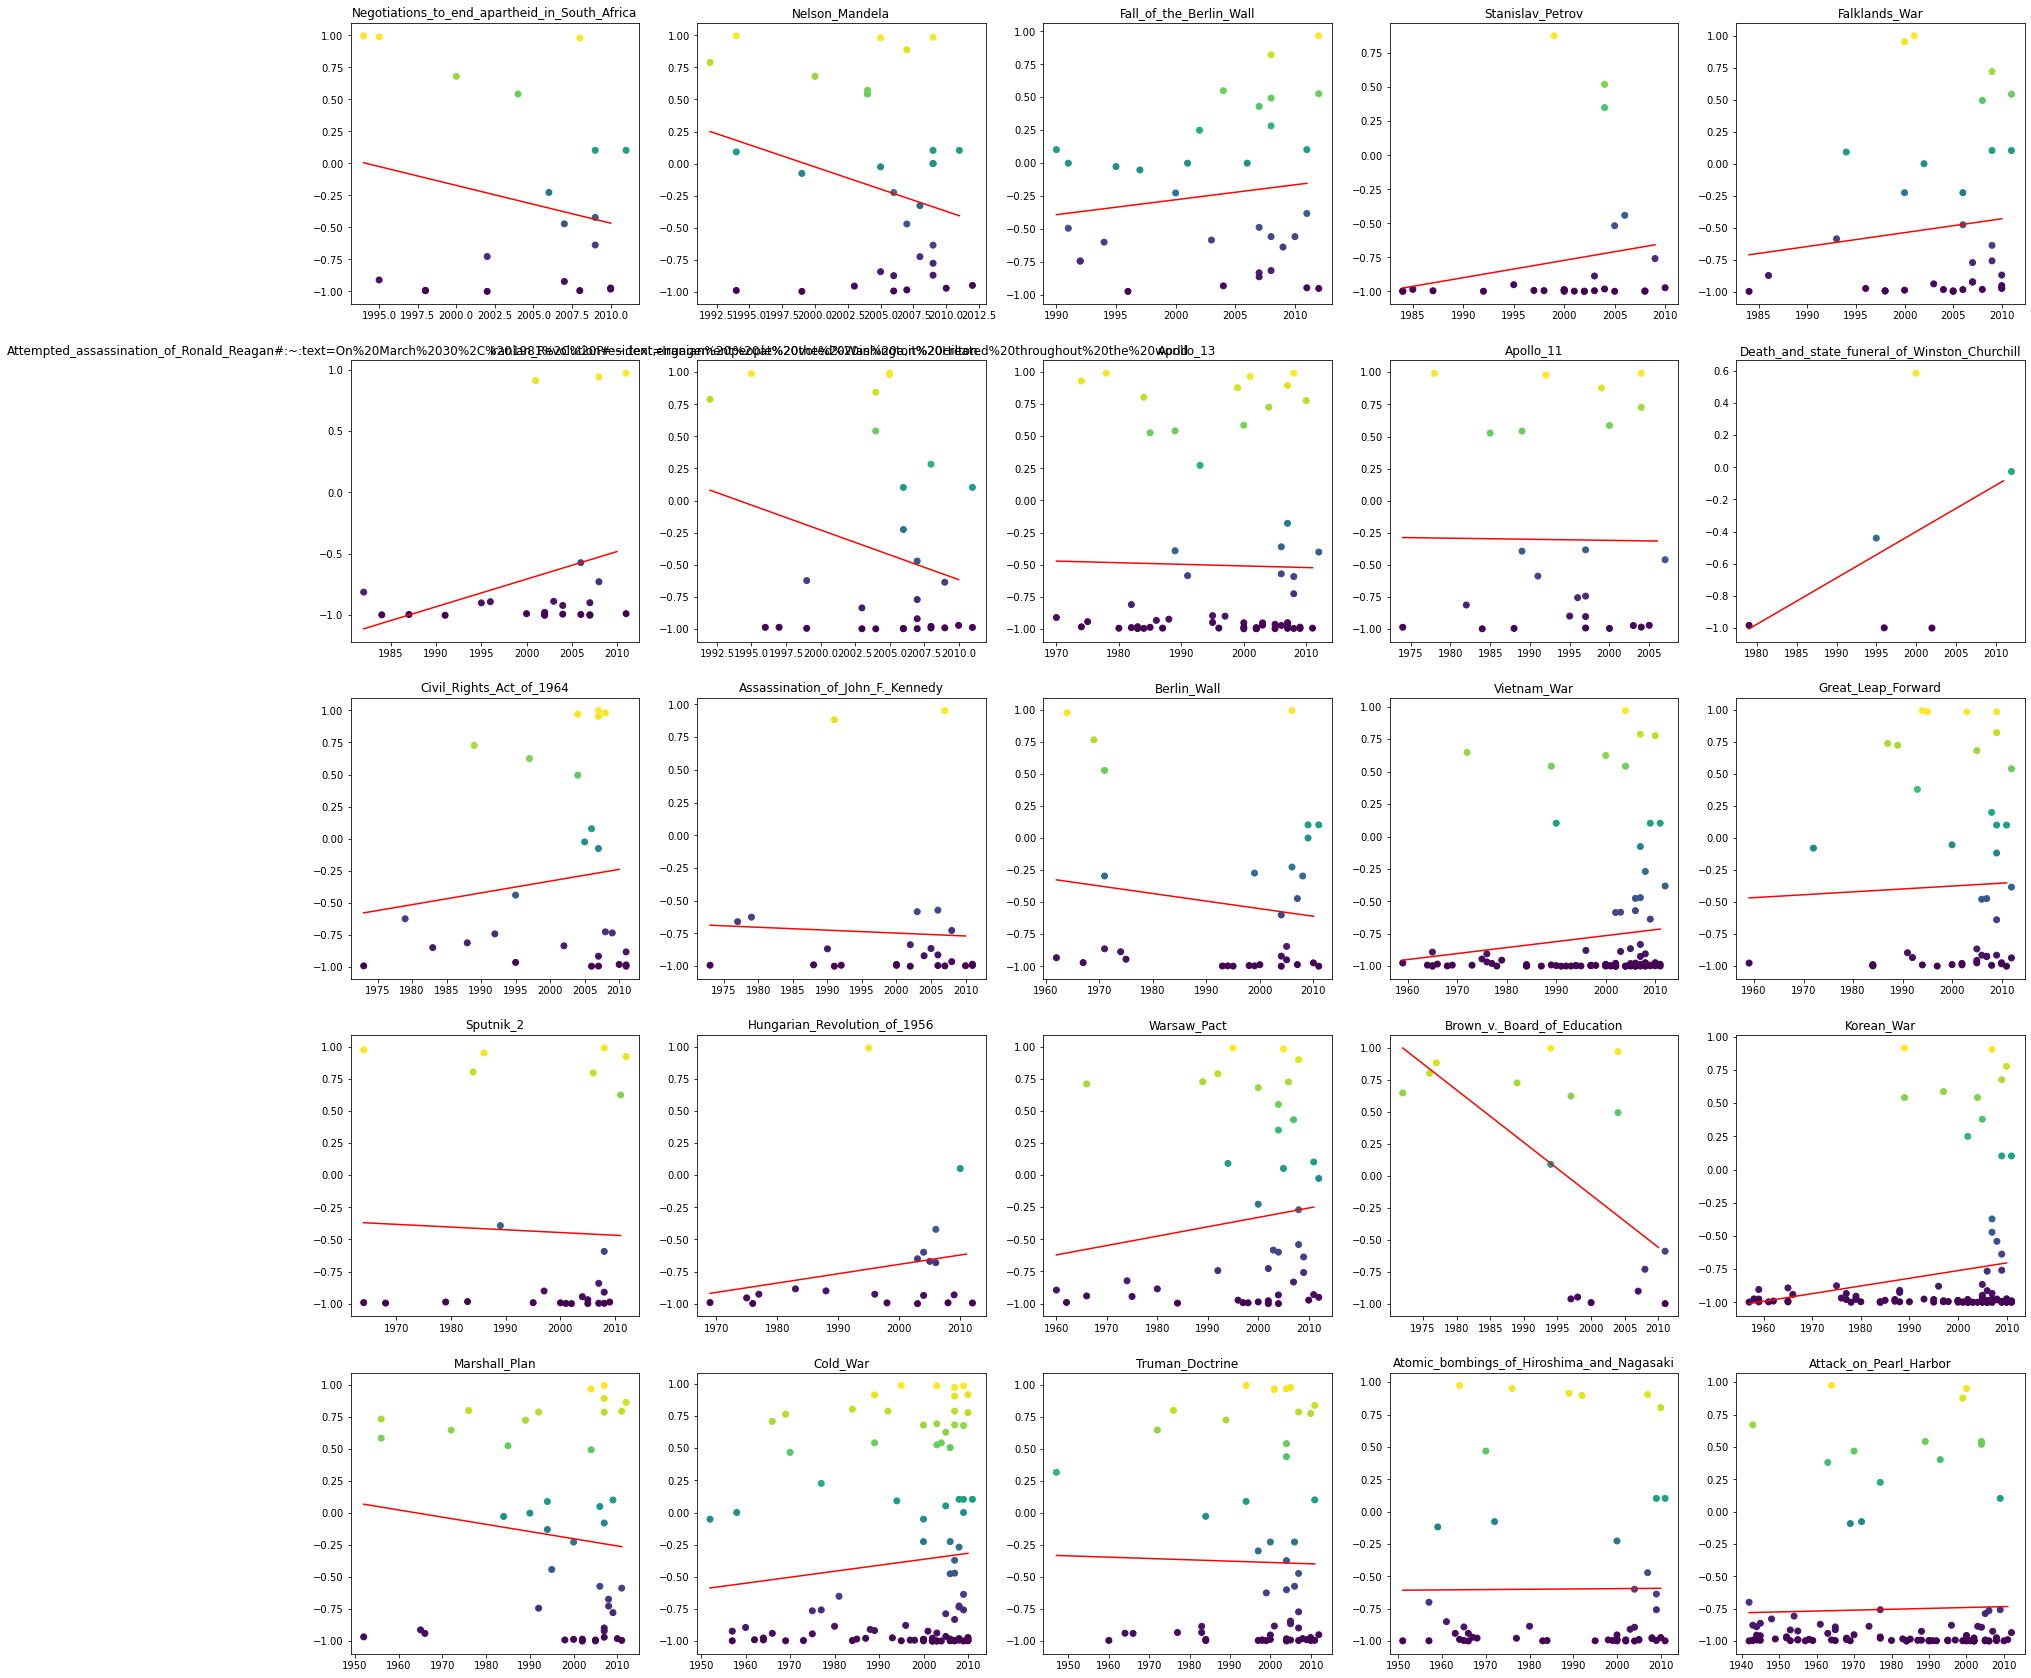

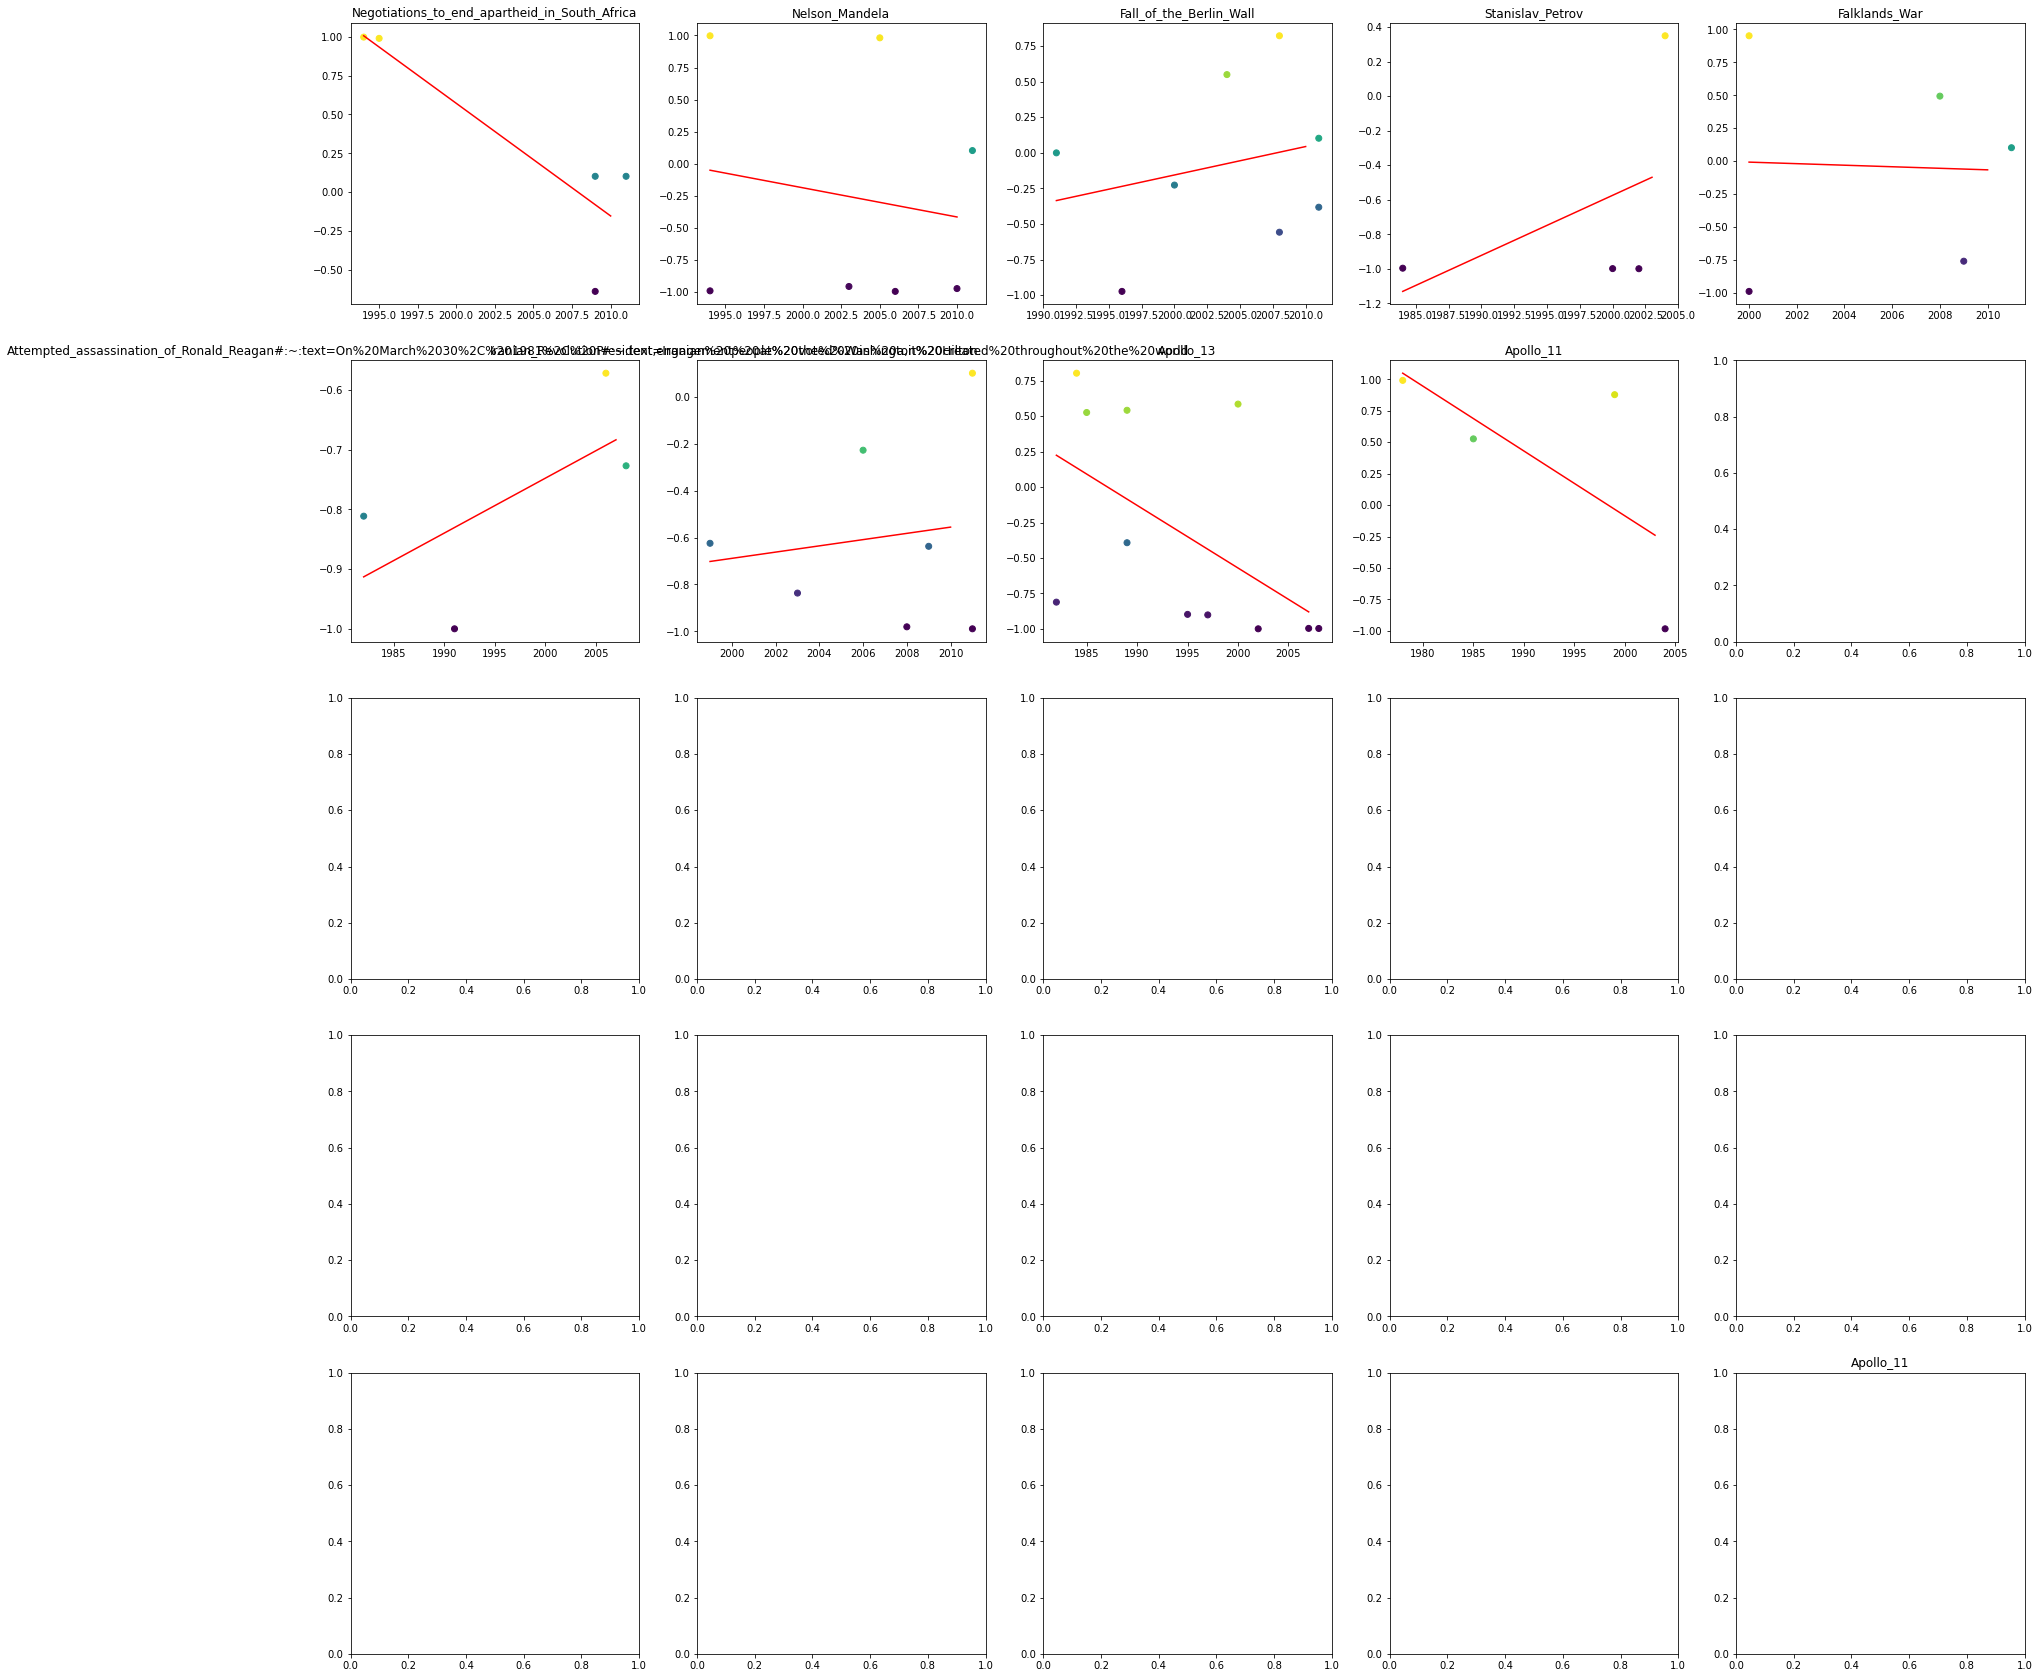

In [141]:
import matplotlib.cm as cm
import numpy as np
import statsmodels.api as sm


def plot_sentiment(top_similar_df, event_Name): 
    currentDF = top_similar_df[top_similar_df['event'] == event_Name]
    x = currentDF['release_date']
    y = currentDF['compound']

    #### for regression: 
    Y = currentDF['compound'].tolist()
    X = currentDF['release_date'].tolist()
    X = sm.add_constant(X)
    model_fit = sm.OLS(Y, X).fit()
    linear_x = np.arange(min(x), max(x), 1)
    linear_y = model_fit.params[0] + model_fit.params[1] * linear_x
    print(model_fit.rsquared)
    ### 

    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c=currentDF["compound"] )
    plt.title(event_Name)
    legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="upper left", title="Ranking")
    ax.add_artist(legend1)
    ax.plot(linear_x, linear_y, color='red')    
    plt.show()

def plot_all_sentiment(threshold):
    fig, axs = plt.subplots(5, 5)
    fig.set_size_inches(30, 30)
    row = 0 
    col = 0 
    for row in range(5):
        for col in range(5):
            currentDF = top_similar_df[top_similar_df['event'] == allevents[row*5 + col][0]]
            print("date is ", allevents[1])
            currentDF = currentDF[currentDF['release_date'] >= allevents[row*5 + col][1]]
            currentDF = currentDF[currentDF['similarity'] > threshold]
            x = currentDF['release_date']
            y = currentDF['compound']

            #### for regression: 
            Y = currentDF['compound'].tolist()
            X = currentDF['release_date'].tolist()
            X = sm.add_constant(X)
            model_fit = sm.OLS(Y, X).fit()
            linear_x = np.arange(min(x), max(x), 1)
            linear_y = model_fit.params[0] + model_fit.params[1] * linear_x
            ### 

            axs[row, col].scatter(x, y, c=currentDF["compound"] )
            axs[row, col].set_title(all_events[row*5 + col])
            axs[row, col].plot(linear_x, linear_y, color='red')   
            print( allevents[row*5 + col][0], model_fit.rsquared)
            plt.title(allevents[row*5 + col][0])

plot_all_sentiment(0.5)
plot_all_sentiment(0.55)
plot_all_sentiment(0.58)

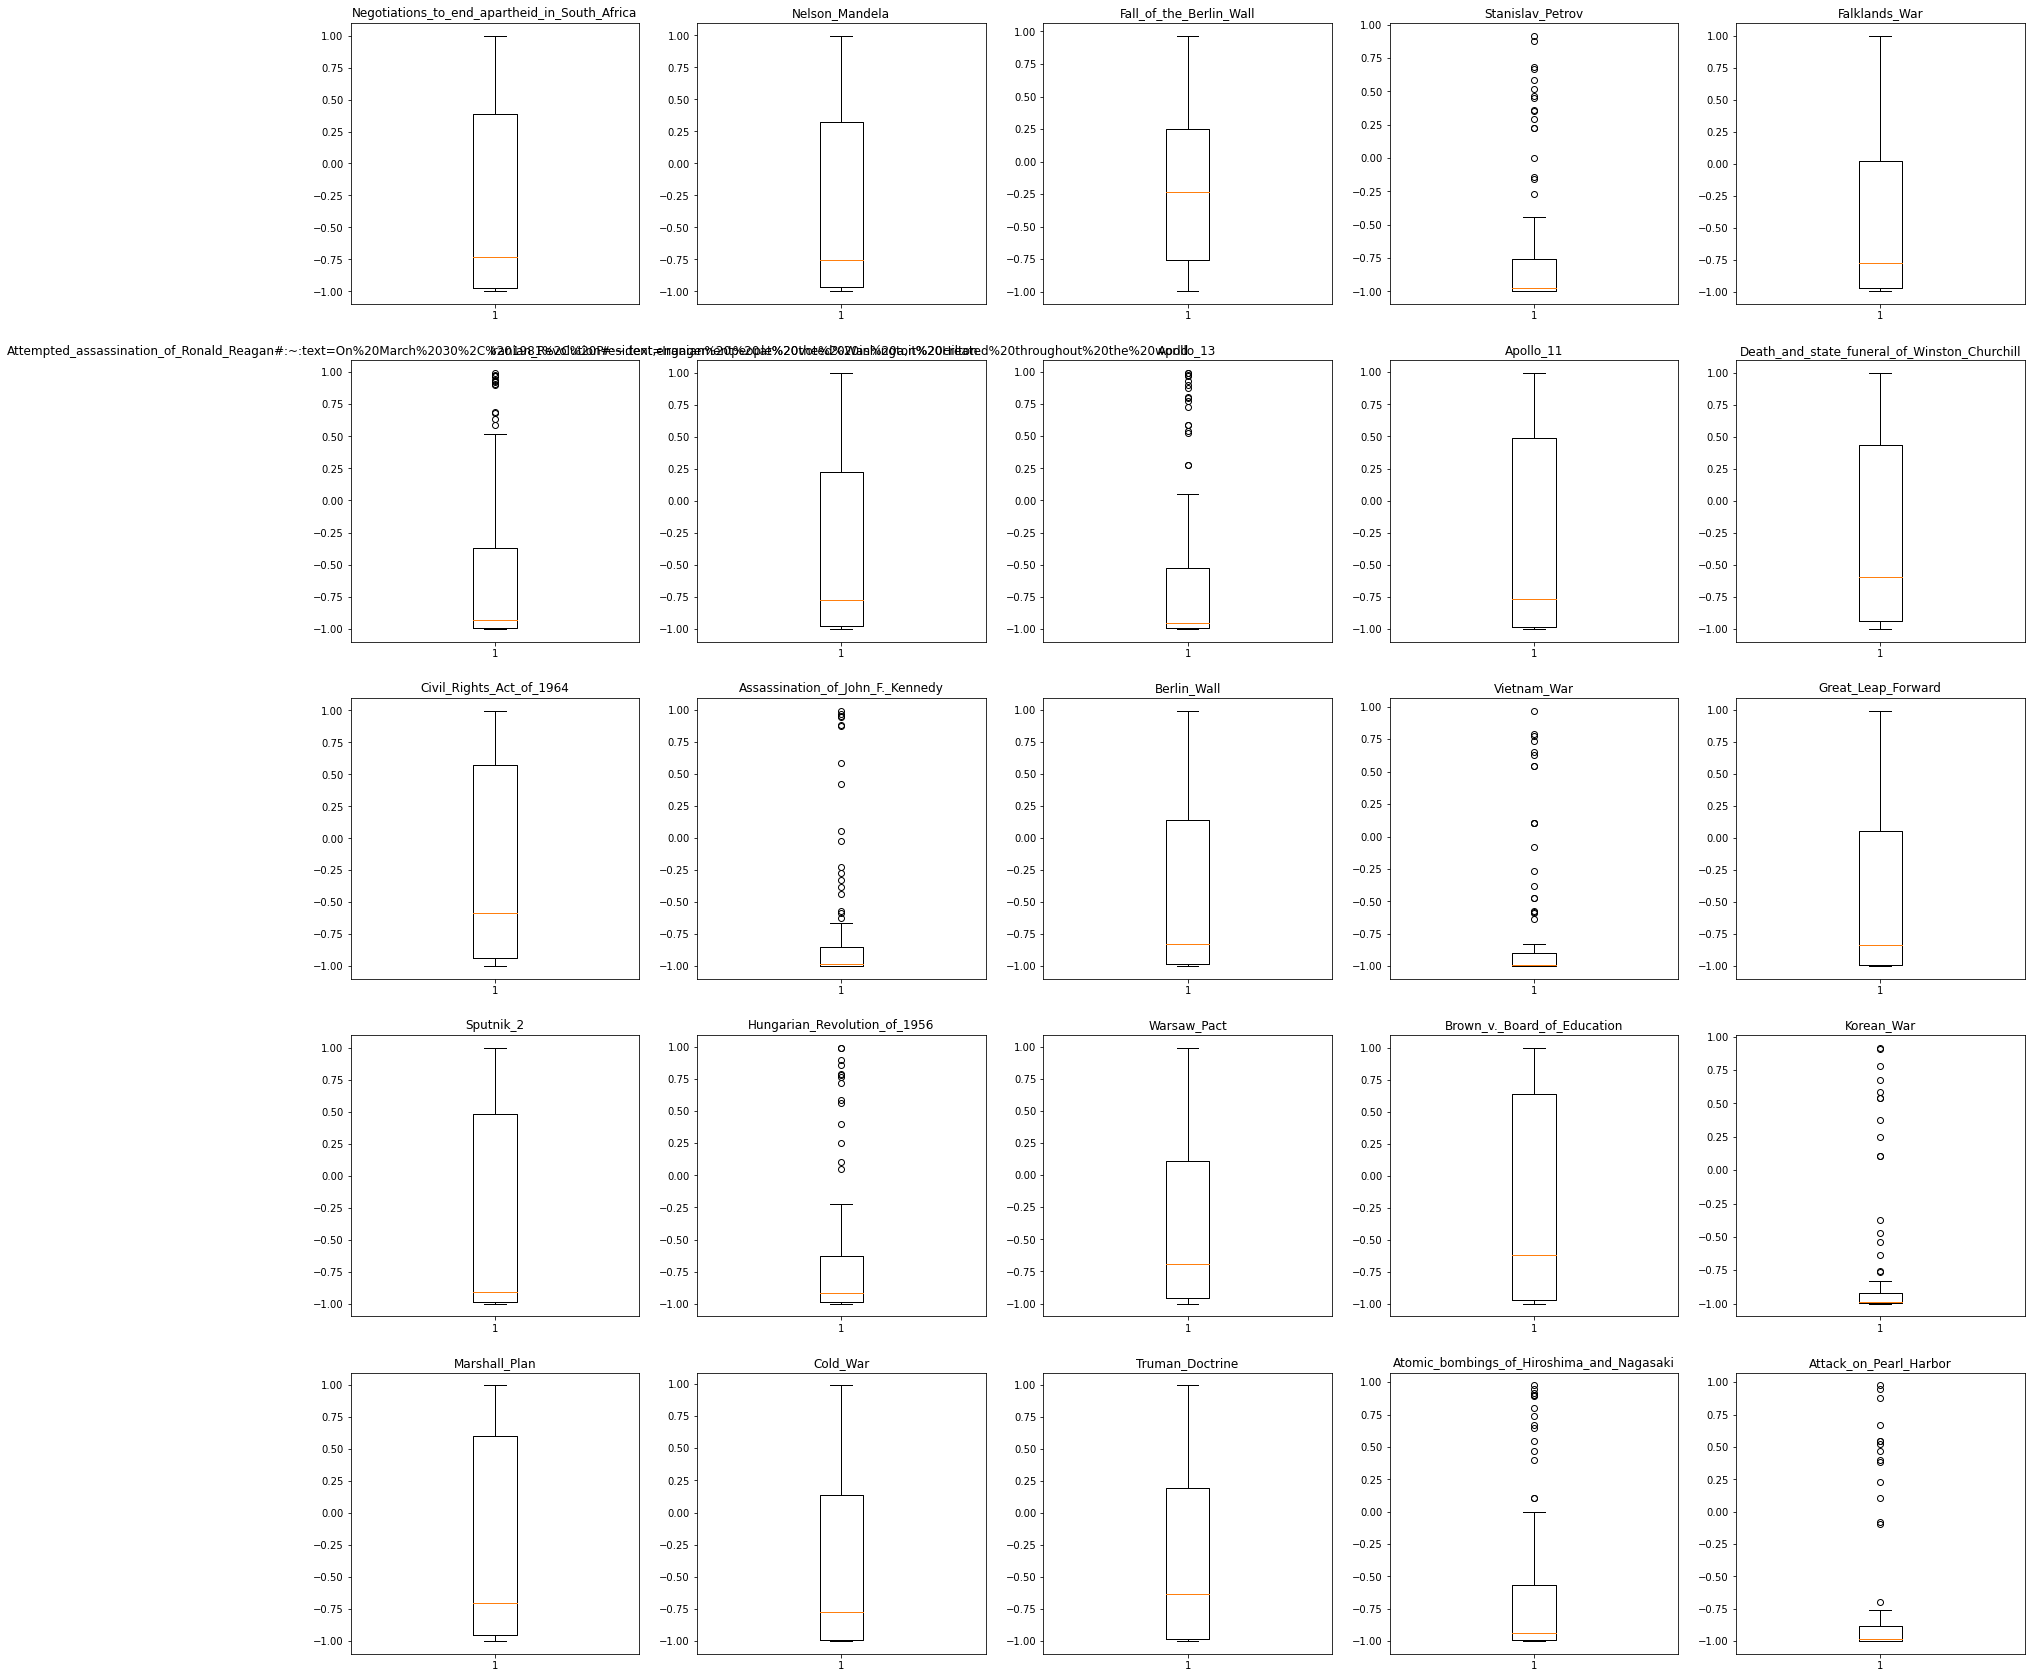

In [ ]:
def plot_all_sentiment_box():
    fig, axs = plt.subplots(5, 5)
    fig.set_size_inches(30, 30)
    row = 0 
    col = 0 
    for row in range(5):
        for col in range(5):
            currentDF = top_similar_df[top_similar_df['event'] == all_events[row*5 + col]]
            x = currentDF['release_date']
            y = currentDF['compound']
            axs[row, col].boxplot( y)
            axs[row, col].set_title(all_events[row*5 + col])
            plt.title(all_events[row*5 + col])

plot_all_sentiment_box()

0.007098744080513808


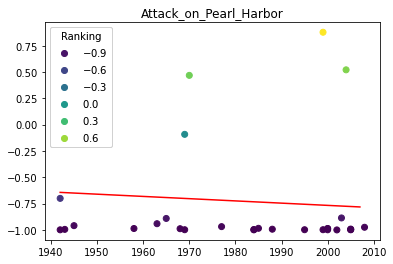

0.0024635661820761046


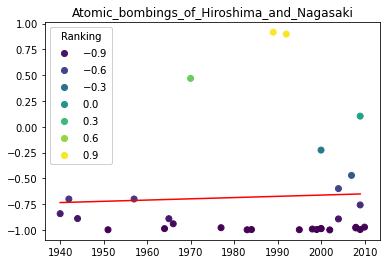

0.010703789080526716


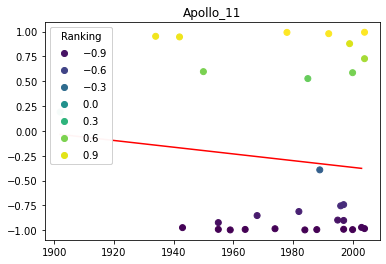

0.0004221057415534357


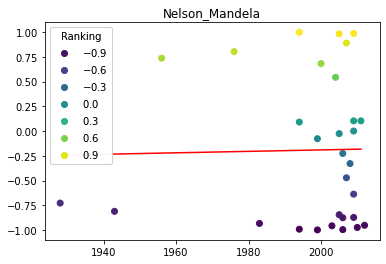

0.0034258790757421


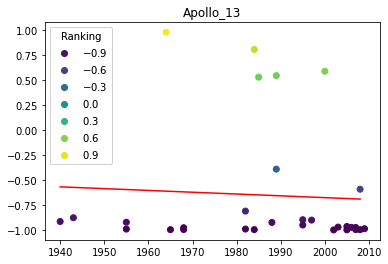

0.012013697069673368


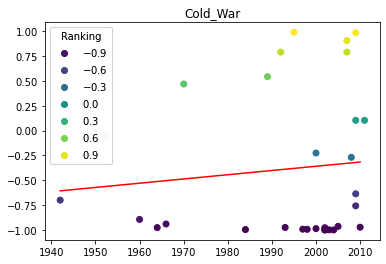

In [ ]:
top_similar_df_less = top_similar_df.sort_values(by = ['similarity'], ascending=False).groupby(by = ['event']).head(30)
plot_sentiment(top_similar_df_less, "Attack_on_Pearl_Harbor")
plot_sentiment(top_similar_df_less, "Atomic_bombings_of_Hiroshima_and_Nagasaki")
plot_sentiment(top_similar_df_less, "Apollo_11")
plot_sentiment(top_similar_df_less, "Nelson_Mandela")
plot_sentiment(top_similar_df_less, "Apollo_13")
plot_sentiment(top_similar_df_less, "Cold_War")